# 서울시 자치구별 CCTV 현황 데이터 분석

In [4]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df['class'].value_counts().sort_index()

class
First     216
Second    184
Third     491
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 1. 서울시 자치구별 CCTV 현황 데이터 읽어오기

In [1]:
import pandas as pd

# Colab에서는 파일의경로명을 해당 파일 옆에 점 세개 버튼의 경로 복사로 복사해 사용
#예) CCTV_Seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/서울시 CCTV 설치운영 현황(자치구)-연도별.csv',encoding='cp949')

CCTV_Seoul = pd.read_csv('서울시 CCTV 설치운영 현황.csv',encoding = 'cp949')
CCTV_Seoul

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,4597,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175
6,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486


# 2. CCTV 현황 데이터 살펴보기

In [2]:
#데이터의 행x열 개수,컬럼,인덱스 정보 보기
print(CCTV_Seoul.shape)
print(CCTV_Seoul.columns)
print(CCTV_Seoul.index)

(26, 13)
Index(['구분', '총계', '2011년 이전', '2011년', '2012년', '2013년', '2014년', '2015년',
       '2016년', '2017년', '2018년', '2019년', '2020년'],
      dtype='object')
RangeIndex(start=0, stop=26, step=1)


In [3]:
#데이터의 위에서 5행 보기
CCTV_Seoul.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,4597,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [4]:
#데이터의 아래에서 5행 보기
CCTV_Seoul.tail()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
24,송파구,2743,64,9,61,86,85,215,146,241,542,1068,226
25,강동구,2547,223,45,27,227,49,154,202,273,377,356,614


In [6]:
#데이터의 통계정보 보기
CCTV_Seoul.describe()

,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,5802.384615,453.923077,124.538462,171.384615,353.615385,336.000000,518.615385,638.461538,776.923077,745.153846,896.692308,787.076923
std,14243.300744,1153.586266,313.384522,424.613337,875.485606,832.063988,1283.423424,1582.773167,1919.477344,1835.587224,2216.506346,1945.202487
min,1356.000000,0.000000,0.000000,0.000000,29.000000,29.000000,79.000000,1.000000,34.000000,85.000000,9.000000,104.000000
25%,2369.500000,14.500000,7.500000,36.000000,90.750000,85.750000,141.000000,176.500000,244.750000,224.250000,245.250000,227.750000
50%,2649.500000,114.500000,43.000000,85.500000,176.000000,125.000000,212.000000,303.500000,354.500000,381.000000,365.000000,343.500000
75%,3712.500000,369.500000,119.250000,134.250000,237.000000,212.250000,333.500000,391.500000,531.500000,541.500000,715.000000,502.500000
max,75431.000000,5901.000000,1619.000000,2228.000000,4597.000000,4368.000000,6742.000000,8300.000000,10100.000000,9687.000000,11657.000000,10232.000000


In [7]:
#데이터의 타입, 아이템 수, 누락데이터 등 보기
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2011년 이전  26 non-null     int64 
 3   2011년     26 non-null     int64 
 4   2012년     26 non-null     int64 
 5   2013년     26 non-null     int64 
 6   2014년     26 non-null     int64 
 7   2015년     26 non-null     int64 
 8   2016년     26 non-null     int64 
 9   2017년     26 non-null     int64 
 10  2018년     26 non-null     int64 
 11  2019년     26 non-null     int64 
 12  2020년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


# 3. CCTV 현황 데이터 정리하기

In [9]:
#CCTV_Seoul 데이터의 열이름을 '구분' -> '구별'로 변경 (columns={'구분' : '구별'})
CCTV_Seoul.rename(columns={'구분' : '구별'},inplace = True)
CCTV_Seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,4597,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [11]:
#다른 데이터들과 년도를 동일하게 맞추기 위해 '2020년' 열 삭제 (columns='2020년',axis=1)
CCTV_Seoul.drop(columns = '2020년',axis = 1,inplace = True)
CCTV_Seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년
0,계,75431,5901,1619,2228,4597,4368,6742,8300,10100,9687,11657
1,종로구,1729,216,7,10,582,210,150,1,259,85,9
2,중구,2001,16,6,199,90,125,218,333,462,228,194
3,용산구,2383,31,3,71,234,125,221,298,351,125,307
4,성동구,3515,487,26,122,207,112,335,309,790,409,262


In [12]:
#'2017년 이전' 열 추가
CCTV_Seoul['2017년 이전']= CCTV_Seoul['총계'] - (CCTV_Seoul['2017년'] + CCTV_Seoul['2018년'] + CCTV_Seoul['2019년'])
CCTV_Seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2017년 이전
0,계,75431,5901,1619,2228,4597,4368,6742,8300,10100,9687,11657,43987
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,1376
2,중구,2001,16,6,199,90,125,218,333,462,228,194,1117
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,1600
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,2054


In [13]:
#불필요한 년도의 열('2011년 이전', '2011년', '2012년', '2013년', '2014년','2015년','2016년') 삭제
CCTV_Seoul.drop(columns=['2011년 이전', '2011년', '2012년', '2013년', '2014년','2015년','2016년'], axis=1, inplace=True)
CCTV_Seoul.head()

,구별,총계,2017년,2018년,2019년,2017년 이전
0,계,75431,10100,9687,11657,43987
1,종로구,1729,259,85,9,1376
2,중구,2001,462,228,194,1117
3,용산구,2383,351,125,307,1600
4,성동구,3515,790,409,262,2054


In [14]:
#불필요한 행(index=0, axis=0) 삭제
CCTV_Seoul.drop(index = 0,axis = 0,inplace = True)
CCTV_Seoul.head()

,구별,총계,2017년,2018년,2019년,2017년 이전
1,종로구,1729,259,85,9,1376
2,중구,2001,462,228,194,1117
3,용산구,2383,351,125,307,1600
4,성동구,3515,790,409,262,2054
5,광진구,2556,675,465,712,704


In [15]:
#drop = True 기존의 인덱스는 버리고 새로 설정
CCTV_Seoul.reset_index(drop=True, inplace=True) 
CCTV_Seoul.head()

,구별,총계,2017년,2018년,2019년,2017년 이전
0,종로구,1729,259,85,9,1376
1,중구,2001,462,228,194,1117
2,용산구,2383,351,125,307,1600
3,성동구,3515,790,409,262,2054
4,광진구,2556,675,465,712,704


# 4. CCTV 현황데이터 자세히 보기

### 4-1. CCTV의 전체 개수가 가장 적은/가장 많은 상위 5개 구는 어디일까?

In [17]:
#데이터 '총계'열을 기준으로 오름차순 정렬하기 (by='총계', ascending = True)
CCTV_Seoul.sort_values(by='총계', ascending = True)

,구별,총계,2017년,2018년,2019년,2017년 이전
9,도봉구,1356,134,223,214,785
0,종로구,1729,259,85,9,1376
1,중구,2001,462,228,194,1117
19,동작구,2262,278,255,242,1487
10,노원구,2282,256,201,240,1585
5,동대문구,2315,136,197,209,1773
17,금천구,2365,196,540,369,1260
2,용산구,2383,351,125,307,1600
13,마포구,2401,358,340,384,1319
15,강서구,2437,506,259,457,1215


In [18]:
#데이터 '총계'열을 기준으로 내림차순 정렬하기 (by='총계', ascending = False)

CCTV_Seoul.sort_values(by='총계', ascending = False)

,구별,총계,2017년,2018년,2019년,2017년 이전
22,강남구,6645,1004,744,796,4101
20,관악구,4909,684,674,596,2955
16,구로구,4075,540,488,434,2613
18,영등포구,3773,311,658,65,2739
7,성북구,3754,461,860,716,1717
21,서초구,3730,1061,436,361,1872
11,은평구,3660,403,635,1057,1565
3,성동구,3515,790,409,262,2054
14,양천구,3307,120,142,255,2790
6,중랑구,3285,152,173,1050,1910


### 4-2. 최근 3년간 CCTV 증가율을 계산하여 '최근증가율' 을 알아보자.

In [19]:
#최근 3년간 CCTV 수를 더하고 2017년 이전 CCTV수로 나눠서 최근 3년간 CCTV 증가율 계산

CCTV_Seoul['최근증가율']=(CCTV_Seoul['2019년'] + CCTV_Seoul['2018년'] + CCTV_Seoul['2017년']) / CCTV_Seoul['2017년 이전']  * 100
CCTV_Seoul.head()

,구별,총계,2017년,2018년,2019년,2017년 이전,최근증가율
0,종로구,1729,259,85,9,1376,25.654070
1,중구,2001,462,228,194,1117,79.140555
2,용산구,2383,351,125,307,1600,48.937500
3,성동구,3515,790,409,262,2054,71.129503
4,광진구,2556,675,465,712,704,263.068182


### 4-3. '최근증가율' 이 가장 높은 상위 5개구는 어디일까?

In [20]:
#'최근증가율'로 내림차순 정렬
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,총계,2017년,2018년,2019년,2017년 이전,최근증가율
4,광진구,2556,675,465,712,704,263.068182
23,송파구,2743,241,542,1068,892,207.511211
11,은평구,3660,403,635,1057,1565,133.865815
8,강북구,2462,34,385,976,1067,130.740394
7,성북구,3754,461,860,716,1717,118.637158


# 5. 서울시 인구현황 데이터 읽어오기

In [21]:
# Colab에서는 파일의 경로명을 해당 파일 옆에 점 세개 버튼의 경로 복사로 복사해 사용
# 예) pop_Seoul = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/행정구역_시군구_별__성별_인구수_서울.xlsx')
pop_Seoul = pd.read_excel('행정구역_시군구_별__성별_인구수_서울.xlsx')
pop_Seoul

,행정구역(시군구)별,2019. 12,2019. 12.1,2019. 12.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,계,9729107,4744059,4985048
2,종로구,151290,73746,77544
3,중구,126171,61910,64261
4,용산구,228670,110356,118314
5,성동구,300889,147273,153616
6,광진구,351350,170262,181088
7,동대문구,346194,172113,174081
8,중랑구,397015,196959,200056
9,성북구,442650,214437,228213


In [22]:
# Colab에서는 파일의 경로명을 해당 파일 옆에 점 세개 버튼의 경로 복사로 복사해 사용
# 예) pop_Seoul = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/행정구역_시군구_별__성별_인구수_서울.xlsx')

#header= 1 옵션은 액셀에서 두번째 줄부터 읽어옴 (숫자는 0부터 시작)
pop_Seoul = pd.read_excel('행정구역_시군구_별__성별_인구수_서울.xlsx',header = 1)
pop_Seoul.head()

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,계,9729107,4744059,4985048
1,종로구,151290,73746,77544
2,중구,126171,61910,64261
3,용산구,228670,110356,118314
4,성동구,300889,147273,153616


In [23]:
#데이터의 행,열 개수,컬럼,인덱스 정보 보기
print(pop_Seoul.shape)
print(pop_Seoul.index)
print(pop_Seoul.columns)

(26, 4)
RangeIndex(start=0, stop=26, step=1)
Index(['행정구역(시군구)별', '총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)'], dtype='object')


# 6. 인구 현황 데이터 정리하기

In [24]:
#컬럼 이름 변경
pop_Seoul.rename(columns={'행정구역(시군구)별':'구별',
                          '총인구수 (명)':'인구수',
                          '남자인구수 (명)':'남성',
                          '여자인구수 (명)': '여성'}, inplace=True)
pop_Seoul.head()

,구별,인구수,남성,여성
0,계,9729107,4744059,4985048
1,종로구,151290,73746,77544
2,중구,126171,61910,64261
3,용산구,228670,110356,118314
4,성동구,300889,147273,153616


In [25]:
#불필요한 행 삭제, 0번 인덱스 줄 삭제
pop_Seoul.drop(index=0, axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,남성,여성
1,종로구,151290,73746,77544
2,중구,126171,61910,64261
3,용산구,228670,110356,118314
4,성동구,300889,147273,153616
5,광진구,351350,170262,181088


In [26]:
#인덱스 새로 설정
pop_Seoul.reset_index(drop=True, inplace=True)
pop_Seoul.head()

,구별,인구수,남성,여성
0,종로구,151290,73746,77544
1,중구,126171,61910,64261
2,용산구,228670,110356,118314
3,성동구,300889,147273,153616
4,광진구,351350,170262,181088


# 7. 인구현황 데이터 자세히 보기

### 7-1. 인구수가 가장 높은 상위 5개 구는 어디일까?

In [27]:
#'인구수'로 내림차순 정렬
pop_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,남성,여성
23,송파구,675961,327164,348797
15,강서구,591796,286563,305233
22,강남구,545169,260806,284363
10,노원구,532905,257923,274982
20,관악구,500094,251009,249085


###  7-2. 여성인구와 남성인구 비율을 알아보자

In [28]:
pop_Seoul['여성비율'] = pop_Seoul['여성'] / pop_Seoul['인구수'] * 100
pop_Seoul['남성비율'] = pop_Seoul['남성'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,남성,여성,여성비율,남성비율
0,종로구,151290,73746,77544,51.255205,48.744795
1,중구,126171,61910,64261,50.931672,49.068328
2,용산구,228670,110356,118314,51.740062,48.259938
3,성동구,300889,147273,153616,51.054043,48.945957
4,광진구,351350,170262,181088,51.540629,48.459371


### 7-3. 여성비율이 가장 높은 상위 5개 구는 어디일까?

In [33]:
#'여성비율'로 내림차순 정렬
pop_Seoul.sort_values(by = '여성비율',ascending = False).head()

,구별,인구수,남성,여성,여성비율,남성비율
13,마포구,374035,176891,197144,52.707367,47.292633
21,서초구,430826,206039,224787,52.175820,47.824180
22,강남구,545169,260806,284363,52.160523,47.839477
12,서대문구,309397,148663,160734,51.950730,48.049270
11,은평구,480032,231528,248504,51.768215,48.231785


### 7-4. 남성비율이 가장 높은 상위 5개 구는 어디일까?

In [34]:
#'남성비율'로 내림차순 정렬
pop_Seoul.sort_values(by = '남성비율',ascending = False).head()

,구별,인구수,남성,여성,여성비율,남성비율
17,금천구,232810,118209,114601,49.225119,50.774881
20,관악구,500094,251009,249085,49.807636,50.192364
5,동대문구,346194,172113,174081,50.284234,49.715766
18,영등포구,367678,182438,185240,50.381040,49.618960
6,중랑구,397015,196959,200056,50.390036,49.609964


# 8. 데이터 합치기

### 8-1. 인구 대비 CCTV 현황을 확인해 보자

In [35]:
# 두 데이터 합치기 (병합기준 열을 '구별'로 병합, on='구별')
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on = '구별')
data_result.head()

,구별,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
0,종로구,1729,259,85,9,1376,25.654070,151290,73746,77544,51.255205,48.744795
1,중구,2001,462,228,194,1117,79.140555,126171,61910,64261,50.931672,49.068328
2,용산구,2383,351,125,307,1600,48.937500,228670,110356,118314,51.740062,48.259938
3,성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957
4,광진구,2556,675,465,712,704,263.068182,351350,170262,181088,51.540629,48.459371


### 8-2. 인덱스 이름을 구이름으로 바꿔보자

In [36]:
data_result.set_index('구별', inplace=True)
data_result.head()

,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
구별,,,,,,,,,,,
종로구,1729,259,85,9,1376,25.654070,151290,73746,77544,51.255205,48.744795
중구,2001,462,228,194,1117,79.140555,126171,61910,64261,50.931672,49.068328
용산구,2383,351,125,307,1600,48.937500,228670,110356,118314,51.740062,48.259938
성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957
광진구,2556,675,465,712,704,263.068182,351350,170262,181088,51.540629,48.459371


In [40]:
#합친 데이터 엑셀파일로 저장하기
# Colab에서는 파일의 경로명을 해당 파일 옆에 점 세개 버튼의 경로 복사로 복사해 사용
# 예) excel_writer = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/CCTV_pop.xlsx')
excel_writer = pd.ExcelWriter('./CCTV_pop.xlsx')
data_result.to_excel('./CCTV_pop.xlsx', index=True)

# 9. 서울시 자치구별 CCTV 현황 분석하기

### 9-1. CCTV 수에 가장 영향을 미치는 항목은 무엇일까?

In [41]:
import numpy as np
# 두 항목간의 상관계수 대각선을 제외하고 상관계수 절대값이 1에 가까울 수록 높은 상관 관계
np.corrcoef(data_result['여성비율'],data_result['총계'])

array([[1.        , 0.03541795],
       [0.03541795, 1.        ]])

In [42]:
np.corrcoef(data_result['남성비율'],data_result['총계'])

array([[ 1.        , -0.03541795],
       [-0.03541795,  1.        ]])

In [43]:
np.corrcoef(data_result['인구수'],data_result['총계'])

array([[1.        , 0.44163914],
       [0.44163914, 1.        ]])

### 9-2. CCTV 수에 가장 영향을 미치는 항목의 수가 가장 큰 구는 CCTV 수도 가장 큰가?

In [44]:
#'인구수'로 내림차순 정렬
data_result.sort_values(by = '인구수',ascending=False)

,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
구별,,,,,,,,,,,
송파구,2743,241,542,1068,892,207.511211,675961,327164,348797,51.600166,48.399834
강서구,2437,506,259,457,1215,100.576132,591796,286563,305233,51.577402,48.422598
강남구,6645,1004,744,796,4101,62.033650,545169,260806,284363,52.160523,47.839477
노원구,2282,256,201,240,1585,43.974763,532905,257923,274982,51.600567,48.399433
관악구,4909,684,674,596,2955,66.125212,500094,251009,249085,49.807636,50.192364
은평구,3660,403,635,1057,1565,133.865815,480032,231528,248504,51.768215,48.231785
양천구,3307,120,142,255,2790,18.530466,458165,225186,232979,50.850458,49.149542
성북구,3754,461,860,716,1717,118.637158,442650,214437,228213,51.556083,48.443917
강동구,2547,273,377,356,1541,65.282284,436067,215335,220732,50.618827,49.381173


In [45]:
#'CCTV수'로 내림차순 정렬
data_result.sort_values(by = '총계',ascending=False)

,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
구별,,,,,,,,,,,
강남구,6645,1004,744,796,4101,62.033650,545169,260806,284363,52.160523,47.839477
관악구,4909,684,674,596,2955,66.125212,500094,251009,249085,49.807636,50.192364
구로구,4075,540,488,434,2613,55.951014,406664,200987,205677,50.576643,49.423357
영등포구,3773,311,658,65,2739,37.751004,367678,182438,185240,50.381040,49.618960
성북구,3754,461,860,716,1717,118.637158,442650,214437,228213,51.556083,48.443917
서초구,3730,1061,436,361,1872,99.252137,430826,206039,224787,52.175820,47.824180
은평구,3660,403,635,1057,1565,133.865815,480032,231528,248504,51.768215,48.231785
성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957
양천구,3307,120,142,255,2790,18.530466,458165,225186,232979,50.850458,49.149542


## 10. 서울시 자치구별 CCTV 현황 시각화

In [46]:
#한글폰트 깨짐 방지 코드
import matplotlib.pyplot as plt

import platform
path = "c:/windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~~~')
    
'''
#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행
적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행
그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행

#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
'''

"\n#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행\n적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행\n그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행\n\n#한글 폰트 깨짐 방지 코드\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport matplotlib as mpl \nimport matplotlib.pyplot as plt \nimport matplotlib.font_manager as fm  \n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\npath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' \nfont_name = fm.FontProperties(fname=path, size=10).get_name()\nprint(font_name)\nplt.rc('font', family=font_name)\n\nfm._rebuild()\nmpl.rcParams['axes.unicode_minus'] = False\n"

### 10-1. CCTV수가 가장 많은 구는 어디인가?

In [52]:
data_result.index

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object', name='구별')

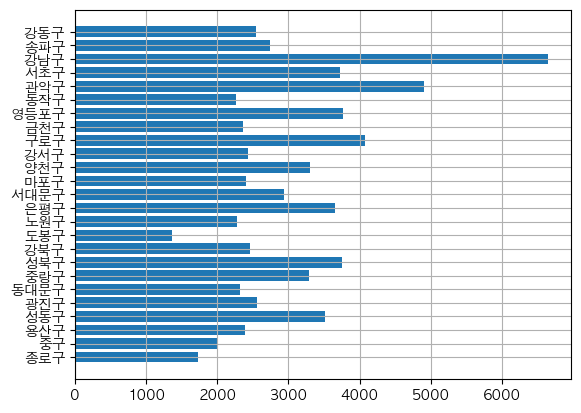

In [57]:
#'총계로' 막대 그래프 그리기 (kind='barh', grid=True, figsize=(10,10)
plt.figsize=(10,10)
x = data_result['총계']
y = data_result.index
plt.barh(y,x)
plt.grid(True)
plt.show()

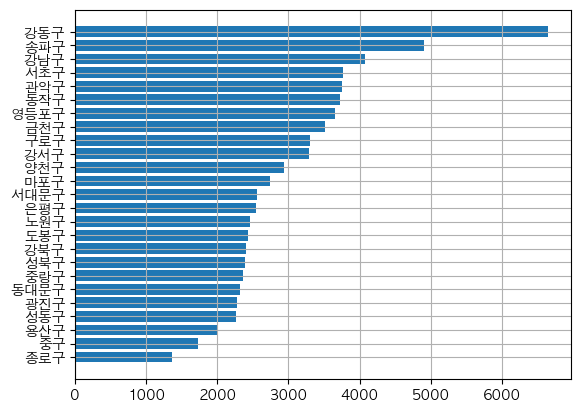

In [59]:
# '총계'로 소팅하여 막대 그래프 그리기 (kind='barh', grid=True, figsize=(10,10))
plt.figsize=(10,10)
x = data_result.sort_values(by = '총계')['총계']
y = data_result.index
plt.barh(y,x)
plt.grid(True)
plt.show()

### 10-2. CCTV의 비율(인구수에 대비 CCTV 수)이 가장 높은 구는 어디인가?

In [60]:
# 'CCTV비율' 열 추가
data_result['CCTV비율'] = data_result['총계'] / data_result['인구수'] * 100
data_result.head()

,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율,CCTV비율
구별,,,,,,,,,,,,
종로구,1729,259,85,9,1376,25.654070,151290,73746,77544,51.255205,48.744795,1.142838
중구,2001,462,228,194,1117,79.140555,126171,61910,64261,50.931672,49.068328,1.585943
용산구,2383,351,125,307,1600,48.937500,228670,110356,118314,51.740062,48.259938,1.042113
성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957,1.168205
광진구,2556,675,465,712,704,263.068182,351350,170262,181088,51.540629,48.459371,0.727480


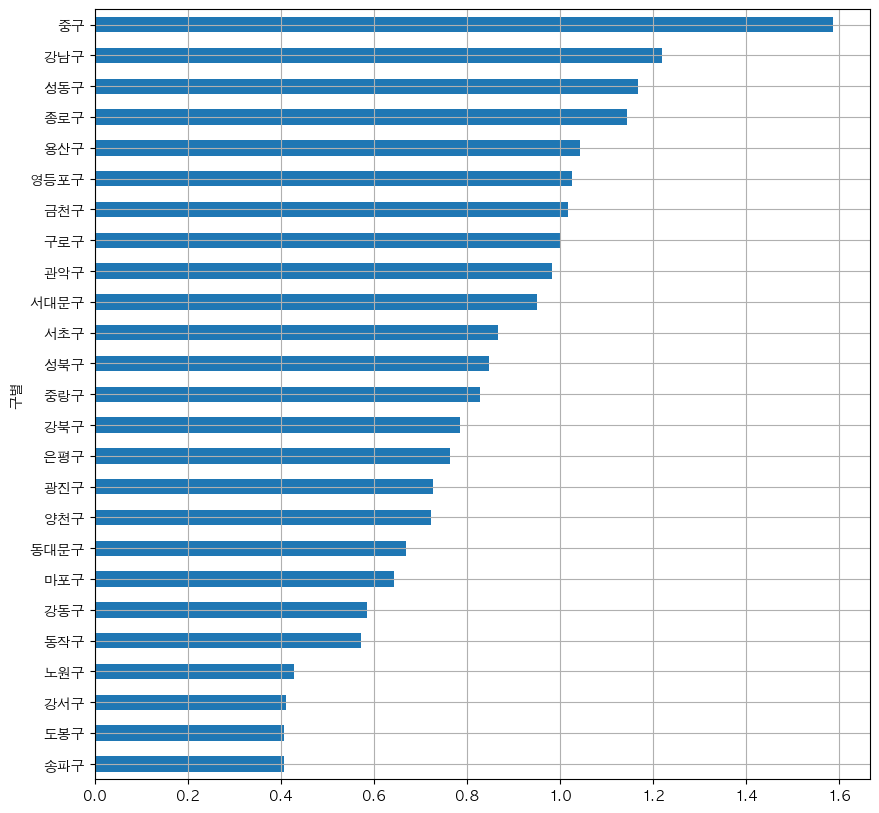

In [61]:
# 소팅한 CCTV비율 막대 그래프 (kind='barh', grid=True, figsize=(10,10))
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 10-3. 인구 수에 대한 CCTV수의 일반적인 분포를 살펴보자

<Figure size 600x600 with 0 Axes>

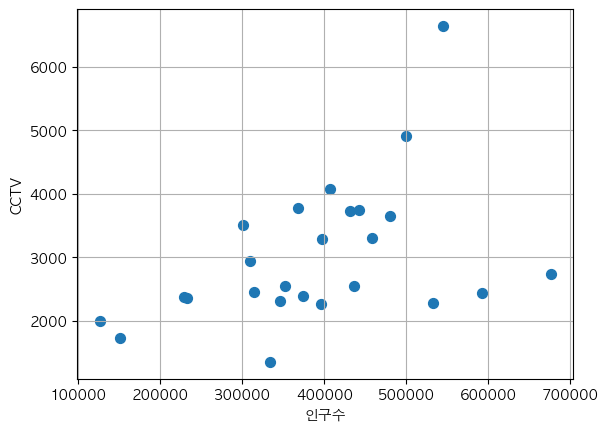

In [62]:
plt.figure(figsize=(6,6))

# 인구수에 대한 CCTV 수 산점도 그래프 (kind='scatter', x='인구수', y='총계', s=50)

data_result.plot(kind='scatter', x='인구수', y='총계', s=50)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 10-4. 일반적인 기준에서 인구 수에 비해 CCTV 수가 많은 구와 적은 구는 어디인가?

In [63]:
# 데이터에 대한 대표선을 나타내는, 기울기, 절편을 fp1에 저장
fp1 = np.polyfit(data_result['인구수'], data_result['총계'], 1)
fp1

array([3.78940395e-03, 1.54253934e+03])

In [64]:
# 직선의 y값 생성시켜주는 함수
f1 = np.poly1d(fp1)
# 지정한 범위 내에서 데이터의 개수만큼 같은 간격의 숫자 생성, x축 숫자 생성
fx = np.linspace(100000, 700000, 100)

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_42807/3312069863.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_result['인구수'][n]*1.02, data_result['총계'][n]*0.98, data_result.index[n], fontsize=10)


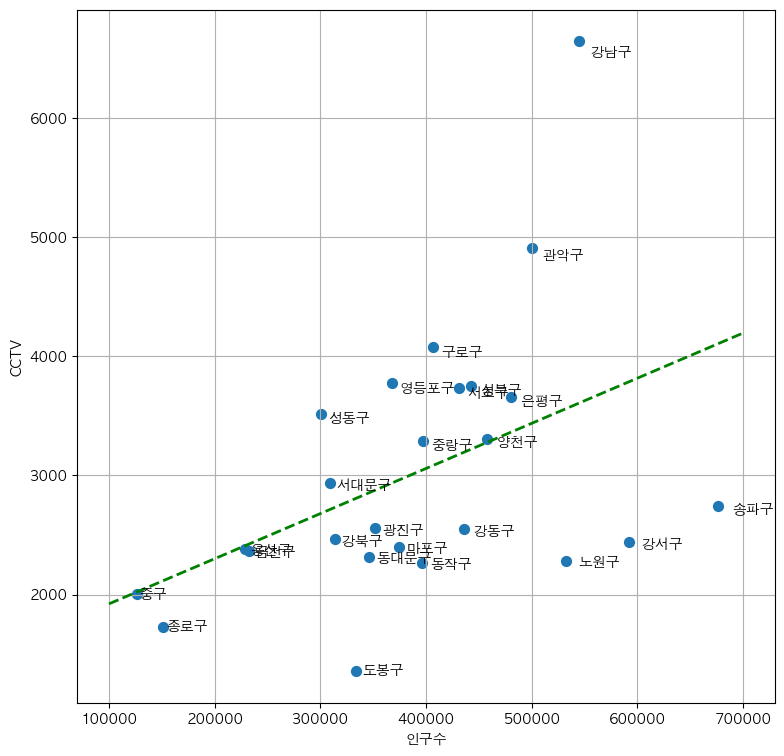

In [65]:
# 산점도 그래프 그리기
plt.figure(figsize=(9,9))
plt.scatter(data_result['인구수'],data_result['총계'], s=50)

# 선그래프 그리기, 순서대로, x축 데이터, y축 데이터, lw는 선 굵기
plt.plot(fx, f1(fx), '--', lw=2, color='g')

#점 옆에 구이름 텍스트 넣기
for n in range(25):
    plt.text(data_result['인구수'][n]*1.02, data_result['총계'][n]*0.98, data_result.index[n], fontsize=10)
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()